<a href="https://colab.research.google.com/github/abdulom4/Astronomy/blob/main/CalculatingBulgeandRotationalCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import astropy.constants as ac # import a Python package to call certain constants, e.g., the gravitational constant.
import astropy.units as u # import a Python package to call certain units, e.g., the mass of the Sun.
import numpy as np # import a Python package to call certain functions.

In [207]:
M = 1 * u.earthMass # define the mass of the Earth.
R = 1 * u.earthRad # define the radius of the Earth.


How to define a function?

In [208]:
def calculatingOrbitalVelocity(M, R):
    """
    This function calculates the orbital velocity of the Earth.
    M, the mass of the central object
    R, the orbital radius of the satellite
    Output:
    orbitalVelocity, the orbital velocity of the satellite
    """
    orbitalVelocity = np.sqrt(ac.G * M / R)
    return orbitalVelocity


In [209]:
M = 1 * u.earthMass # define the mass of the Earth.
R = 1 * u.earthRad  # define the radius of the Earth.
v_earthSatellite = calculatingOrbitalVelocity(M, R) # call the function to calculate the orbital velocity of the Earth. Using a predefined function
print(v_earthSatellite.to(u.km/u.s))  # print the orbital velocity of the Earth.

7.905388234385281 km / s


Introducing the concept of an array.

In [210]:
R_planet_arr = np.array([0.4, 0.7, 1.0, 1.5, 5.2, 9.6, 19.2, 30.1])* u.au # Defining orbital radius of the eight solar system planets fron inside out
# Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune

In [211]:
# This is to calculate the orbital velocity of the eight planets.
M_Sun = 1 * u.solMass # Defining the mass of the Sun
v_planet_arr = calculatingOrbitalVelocity(M_Sun, R_planet_arr) # Calculating the orbital velocity of the eight solar system planets
print(v_planet_arr.to(u.km/u.s)) # Printing the orbital velocity of the eight solar system planets

[47.09373279 35.5995158  29.78469183 24.31909904 13.06145141  9.61296795
  6.79739483  5.42887526] km / s


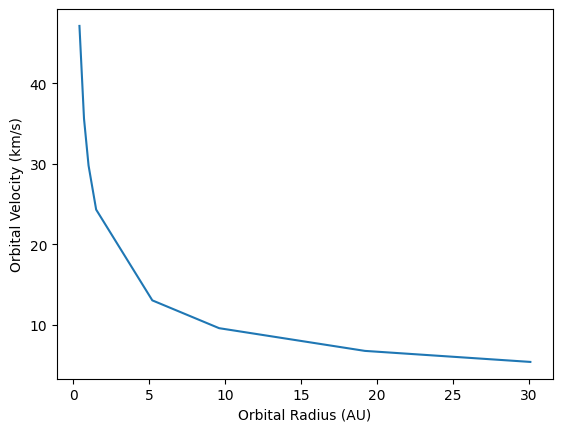

In [212]:
# prompt: can help with plotting v_planet_arr and R_planet_arr?

import matplotlib.pyplot as plt # importing plotting package
plt.plot(R_planet_arr, v_planet_arr.to(u.km/u.s)) # Plotting velocity vs. orbital radius
plt.xlabel("Orbital Radius (AU)") # Add x axis label
plt.ylabel("Orbital Velocity (km/s)") # Add y axis label
plt.show()

In [213]:
print(np.arange(1, 30) * u.kpc) # prints the range using kpc

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.] kpc


In [331]:
M_bulge = 2e10 * u.solMass # Defining the mass of the bulge
R_bulge = np.arange(1, 30) * u.kpc # Defining the range of the bulge radius
v_bulge = calculatingOrbitalVelocity(M_bulge, R_bulge) # Calculating the orbital velocity of the bulge
print(v_bulge.to(u.km/u.s)) # Printing the orbital velocity of the bulge

[293.28884295 207.3865297  169.33039243 146.64442148 131.16275798
 119.73466875 110.85276297 103.69326485  97.76294765  92.7460756
  88.42991339  84.66519621  81.34368937  78.38474041  75.72685363
  73.32221074  71.13299284  69.12884323  67.28507514  65.58137899
  64.00087254  62.52939142  61.15495124  59.86733437  58.65776859
  57.51867436  56.44346414  55.42638148  54.46237088] km / s


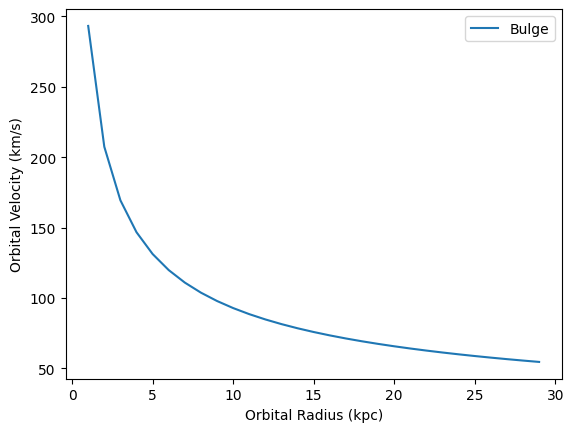

In [332]:
import matplotlib.pyplot as plt # importing plotting package
R_arr = np.arange(1, 30) * u.kpc # Defining the range of the bulge radius
v_bulge = calculatingOrbitalVelocity(M_bulge, R_bulge) # Calculating the orbital velocity of the bulge
plt.plot(R_bulge, v_bulge.to(u.km/u.s)) # Plotting velocity vs. orbital radius
plt.xlabel("Orbital Radius (kpc)") # Add x axis label
plt.ylabel("Orbital Velocity (km/s)") # Add y axis label
plt.legend(["Bulge"])  # Add legend use it to define Bulge
plt.show()

In [333]:
print(np.arange(1, 30) * u.kpc) # prints the range using kpc

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.] kpc


In [334]:
M_disk = (1.275e11)* u.solMass # Defining the mass of the disk
R_disk = 10 * u.kpc # Defining the radius of the disk
density_disk = M_disk / (np.pi * R_disk**2) # Calculating the density of the disk in solar mass per kpc
print(density_disk.to(1e6 * u.solMass/u.kpc**2)) # Printing the density of the disk
v_disk = calculatingOrbitalVelocity(M_disk, R_disk) # Calculating the orbital velocity of the disk
print(v_disk.to(u.km/u.s)) # Printing the orbital velocity of the disk

405.84510488433307 1e+06 solMass / kpc2
234.17236214584028 km / s


In [335]:
def calculatingEnclosedMassForDisk(R, density = 405 * 1e6 * u.solMass/u.kpc**2):
  """
Calculate enclosed mass for the disk component
Input: R - orbital radius, density - density of the disk as calculated above
Output: M - enclosed mass
  """
  if R < 10 * u.kpc:
    M = np.pi * (R**2) * density
  else:
    R = 10 * u.kpc
    M = np.pi * (R**2) * density
  return (M)

In [278]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc") # to convert to million solar mass to increase readability

1247.212283475148 1e+06 solMass at 1 kpc
31180.3070868787 1e+06 solMass at 5 kpc


In [336]:
def calculatingEnclosedMassForMilkyWay(R, density_disk = 405 * 1e6 * u.solMass/u.kpc**2, M_bulge = 2e10 * u.solMass):
  """
Calculate enclosed mass for the disk component
Input: R - orbital radius, density_disk - density of the disk as calculated above, M_bulge - mass of the bulge
Output: M - enclosed mass\
  """
  M_disk = calculatingEnclosedMassForDisk(R, density_disk)
  M_total = M_disk + M_bulge
  return (M_total)
  calculatingEnclosedMassForMilkyWay(R_disk)

1.0990265 x 10^11 M ☉

In [337]:
v_bulge_arr = calculatingOrbitalVelocity(M_bulge, R_arr)  # Redefining the array

In [338]:
M_disk = np.zeros(len(R_arr)) * u.solMass # Defining the mass of the disk
M_total = np.zeros(len(R_arr)) * u.solMass # Defining the total mass
for i in range(len(R_arr)):
  M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])  # Calculating the enclosed mass of the disk
  M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])  # Calculating the total enclosed mass
  V_disk_arr = calculatingOrbitalVelocity(M_disk, R_arr)  # Calculating the Orbital Velocity of the disk
  V_total_arr = calculatingOrbitalVelocity(M_total, R_arr)  # Calculating the total Oribital Velocity of the disk

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.26242314e+07 1.30496926e+08 2.93618083e+08 ... 3.26242314e+09
  3.26242314e+09 3.26242314e+09]
 [6.52484628e+07 2.60993851e+08 5.87236165e+08 ... 6.52484628e+09
  6.52484628e+09 6.52484628e+09]
 ...
 [1.20709656e+09 4.82838625e+09 1.08638691e+10 ... 1.20709656e+11
  1.20709656e+11 1.20709656e+11]
 [1.23972079e+09 4.95888317e+09 1.11574871e+10 ... 1.23972079e+11
  1.23972079e+11 1.23972079e+11]
 [1.27234502e+09 5.08938010e+09 1.14511052e+10 ... 1.27234502e+11
  1.27234502e+11 1.27234502e+11]] solMass


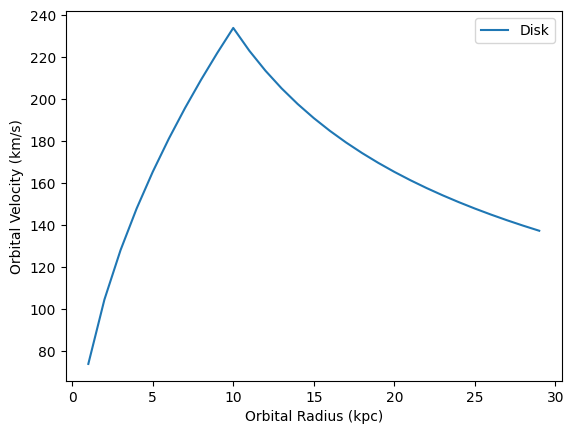

In [339]:
import matplotlib.pyplot as plt # importing plotting package
R_disk = np.arange(1, 30) * u.kpc # Defining the range of the disk radius
M_arr = np.linspace(0, M_disk, 40) # prints the range using kpc
print(M_arr)
v_disk = calculatingOrbitalVelocity(M_disk, R_disk) # Calculating the orbital velocity of the disk
plt.plot(R_disk, v_disk.to(u.km/u.s)) # Plotting velocity vs. orbital radius
plt.xlabel("Orbital Radius (kpc)") # Add x axis label
plt.ylabel("Orbital Velocity (km/s)") # Add y axis label
plt.legend(["Disk"])  # Add legend
plt.show()

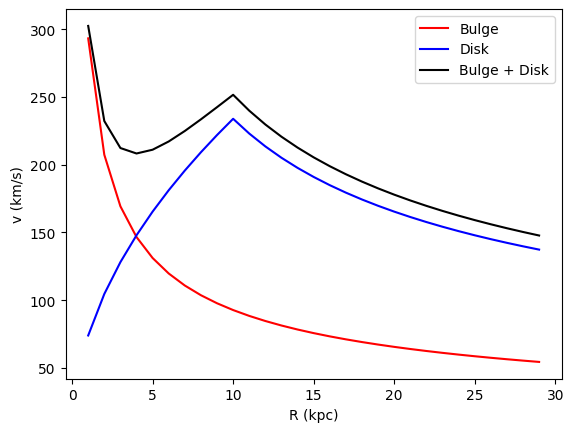

In [340]:
plt.plot(R_bulge.to(u.kpc), v_bulge.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_disk.to(u.kpc), v_disk.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), V_total_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [341]:
M_halo = 1e12 * u.solMass # Defining the mass of the halo
R_halo = 40 * u.kpc # Defining the radius of the halo
R_halo_arr = np.arange(1, 30) * u.kpc # Defining the range of the halo radius
density_halo = M_halo / (np.pi * (R_halo**3)*4/3) # Calculating the density of the halo in solar mass per kpc
print(density_halo.to(1e12 * u.solMass/u.kpc**3)) # Printing the density of the halo
v_halo = calculatingOrbitalVelocity(M_halo, R_halo) # Calculating the orbital velocity of the halo
print(v_halo.to(u.km/u.s)) # Printing the orbital velocity of the halo

3.730193978716297e-06 1e+12 solMass / kpc3
327.90689494261477 km / s


In [342]:
def calculatingEnclosedMassForHalo(R, density = density_halo):
  """
Calculate enclosed mass for the halo component
Input: R - orbital radius, density - density of the halo as calculated above
Output: M - enclosed mass
  """
  R < 40 * u.kpc # Defining the radius of the halo
  M = np.pi * ((R**3)*4/3) * density
  return (M)

In [343]:
def calculatingEnclosedMassForMilkyWay(R, density_disk = density_disk , M_bulge = M_bulge):
  """
Calculate enclosed mass for the disk component
Input: R - orbital radius, density_disk - density of the disk as calculated above, M_bulge - mass of the bulge
Output: M - enclosed mass\
  """
  M_disk = calculatingEnclosedMassForDisk(R, density_disk)
  M_halo = calculatingEnclosedMassForHalo(R)
  M_total = M_disk + M_bulge + M_halo
  return (M_total)
  calculatingEnclosedMassForMilkyWay(R_disk)

In [344]:
M_halo_arr = calculatingEnclosedMassForHalo(R_halo_arr) # Calculating the enclosed mass of the halo
print(M_halo_arr)
v_halo_arr = calculatingOrbitalVelocity(M_halo_arr, R_halo_arr) # Calculating the orbital velocity of the halo

[1.56250000e+07 1.25000000e+08 4.21875000e+08 1.00000000e+09
 1.95312500e+09 3.37500000e+09 5.35937500e+09 8.00000000e+09
 1.13906250e+10 1.56250000e+10 2.07968750e+10 2.70000000e+10
 3.43281250e+10 4.28750000e+10 5.27343750e+10 6.40000000e+10
 7.67656250e+10 9.11250000e+10 1.07171875e+11 1.25000000e+11
 1.44703125e+11 1.66375000e+11 1.90109375e+11 2.16000000e+11
 2.44140625e+11 2.74625000e+11 3.07546875e+11 3.43000000e+11
 3.81078125e+11] solMass


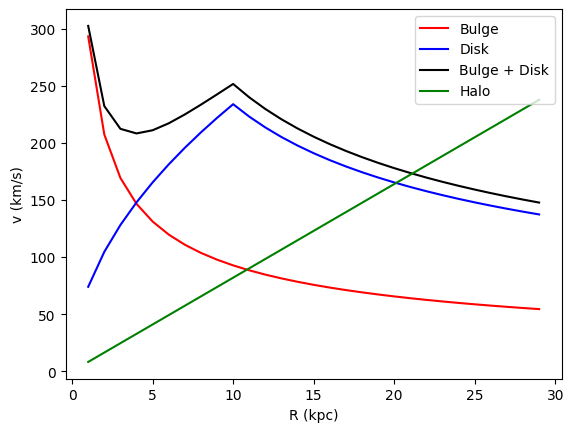

In [345]:
plt.plot(R_bulge.to(u.kpc), v_bulge.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_disk.to(u.kpc), v_disk.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), V_total_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.plot(R_halo_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [230]:
# The following code allows you to upload a data file that you can find in my github page:
# https://github.com/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotation_2006.txt
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (4).txt


In [346]:
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

In [347]:
M_total = calculatingEnclosedMassForMilkyWay(R_arr[i])  # Calculating the total enclosed mass

In [348]:
def calculatingEnclosedMassForMilkyWay1(R, density_disk = density_disk , M_bulge = M_bulge):
  """
Calculate enclosed mass for the disk component
Input: R - orbital radius, density_disk - density of the disk as calculated above, M_bulge - mass of the bulge
Output: M - enclosed mass\
  """
  M_disk = calculatingEnclosedMassForDisk(R, density_disk)
  M_halo = calculatingEnclosedMassForHalo(R, density_halo)
  M_total2 = M_disk + M_bulge + M_halo
  return (M_total2)
#M_total2 = calculatingEnclosedMassForMilkyWay(R_disk)

In [349]:
M_disk = np.zeros(len(R_arr)) * u.solMass # Defining the mass of the disk
M_halo = np.zeros(len(R_arr)) * u.solMass # Defining the mass of the halo
M_total2 = np.zeros(len(R_arr)) * u.solMass # Defining the total mass
for i in range(len(R_arr)):
  M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])  # Calculating the enclosed mass of the disk
  M_total2[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])  # Calculating the total enclosed mass
V_disk_arr = calculatingOrbitalVelocity(M_disk, R_arr)  # Calculating the Orbital Velocity of the disk
V_total_arr1 = calculatingOrbitalVelocity(M_total2, R_arr)  # Calculating the total Orbital Velocity of the disk

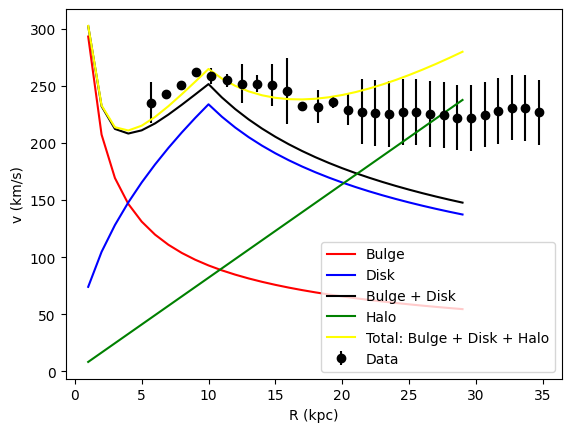

In [350]:
# Plot the data

plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

# Overplot our calculations, basically copy and pater from the previous plotting coding cell
plt.plot(R_bulge.to(u.kpc), v_bulge.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_disk.to(u.kpc), v_disk.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), V_total_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.plot(R_halo_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.plot(R_halo_arr.to(u.kpc), V_total_arr1.to(u.km/u.s), color="yellow", label="Total: Bulge + Disk + Halo") # plotting total
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [236]:
# I was having trouble and was wondering if I needed to do R_arr + R_halo_arr total to fix this but, I wasn't sure how to implement it